In [1]:
#see :
# http://pandas.pydata.org/pandas-docs/version/0.17.0/cookbook.html#cookbook
# for more info :D

In [2]:
#import lybraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Creating a Series by passing a list of values:
s = pd.Series([1, 2, 7, np.nan, 8])
s

0    1.0
1    2.0
2    7.0
3    NaN
4    8.0
dtype: float64

In [5]:
#Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

#create date time:
dates = pd.date_range('20130101', periods=6)
#will create date time index with 6 days (periods) starting from 2013-01-01 !!

df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
#np.random.randn(6,4): a 6*4 matrix of random elements in [0, 1]

print(dates)
df

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


,A,B,C,D
2013-01-01,0.390226,-2.054199,0.657270,1.316548
2013-01-02,-3.187385,-0.152897,-0.867015,1.011308
2013-01-03,-0.686898,-1.386755,0.386087,0.062671
2013-01-04,0.842650,1.329057,-0.146903,-0.999035
2013-01-05,0.006901,-0.634386,0.288305,-0.430313
2013-01-06,0.371221,-0.217506,0.511778,0.060363


In [6]:
df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

In [7]:
#display columns
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [8]:
#Describe shows a quick statistic summary of your data:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.377214,-0.519448,0.138254,0.170257
std,1.468176,1.163047,0.562977,0.868669
min,-3.187385,-2.054199,-0.867015,-0.999035
25%,-0.513448,-1.198663,-0.038101,-0.307644
50%,0.189061,-0.425946,0.337196,0.061517
75%,0.385475,-0.169049,0.480355,0.774149
max,0.842650,1.329057,0.657270,1.316548


In [11]:
#Sorting:

#by axis :
df_axis = df.sort_index(axis=1, ascending=False) #by decreasing values on column names (D -> A)

#by values :
df_values = df.sort_values(by='B')

print(df_axis)
print(df_values)

                   D         C         B         A
2013-01-01  1.316548  0.657270 -2.054199  0.390226
2013-01-02  1.011308 -0.867015 -0.152897 -3.187385
2013-01-03  0.062671  0.386087 -1.386755 -0.686898
2013-01-04 -0.999035 -0.146903  1.329057  0.842650
2013-01-05 -0.430313  0.288305 -0.634386  0.006901
2013-01-06  0.060363  0.511778 -0.217506  0.371221
                   A         B         C         D
2013-01-01  0.390226 -2.054199  0.657270  1.316548
2013-01-03 -0.686898 -1.386755  0.386087  0.062671
2013-01-05  0.006901 -0.634386  0.288305 -0.430313
2013-01-06  0.371221 -0.217506  0.511778  0.060363
2013-01-02 -3.187385 -0.152897 -0.867015  1.011308
2013-01-04  0.842650  1.329057 -0.146903 -0.999035


In [12]:
#selection:
df.iloc[3]

A    0.842650
B    1.329057
C   -0.146903
D   -0.999035
Name: 2013-01-04 00:00:00, dtype: float64

In [25]:
#use "isin()" for filtering:
df['C'].isin([0.657270, 0.511778])

2013-01-01    False
2013-01-02    False
2013-01-03    False
2013-01-04    False
2013-01-05    False
2013-01-06    False
Freq: D, Name: C, dtype: bool

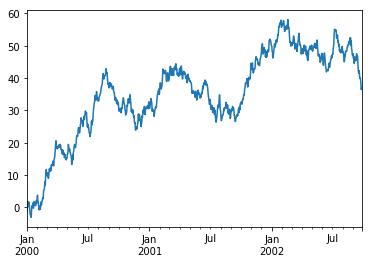

In [26]:
#some plottings:
#series
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

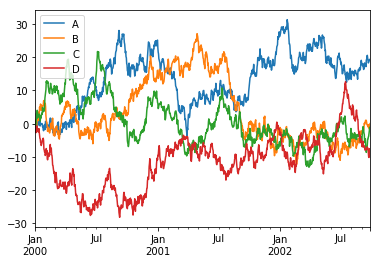

In [27]:
#data frames:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])

df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

In [29]:
#MultiIndexing:
df = pd.DataFrame({'row' : [0,1,2],
                   'One_X' : [1.1,1.1,1.1],
                   'One_Y' : [1.2,1.2,1.2],
                   'Two_X' : [1.11,1.11,1.11],
                   'Two_Y' : [1.22,1.22,1.22]})
df

,row,One_X,One_Y,Two_X,Two_Y
0,0,1.1,1.2,1.11,1.22
1,1,1.1,1.2,1.11,1.22
2,2,1.1,1.2,1.11,1.22


In [30]:
df = df.set_index('row')
df

,One_X,One_Y,Two_X,Two_Y
row,,,,
0,1.1,1.2,1.11,1.22
1,1.1,1.2,1.11,1.22
2,1.1,1.2,1.11,1.22


In [31]:
# With Heirarchical Columns
df.columns = pd.MultiIndex.from_tuples([tuple(c.split('_')) for c in df.columns])
df

One        Two      
       X    Y     X     Y
row                      
0    1.1  1.2  1.11  1.22
1    1.1  1.2  1.11  1.22
2    1.1  1.2  1.11  1.22